In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
raw_data = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [4]:
raw_data['loan_status'] = raw_data['loan_status'].replace('Fully Paid',0).replace('Charged Off',1)

In [226]:
raw_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,0,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,1,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,0,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,0,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,0,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,0,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [5]:
raw_data.corr()['loan_status'].sort_values()

mort_acc               -0.073111
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009383
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082373
int_rate                0.247758
loan_status             1.000000
Name: loan_status, dtype: float64

# Data exploration

<AxesSubplot:>

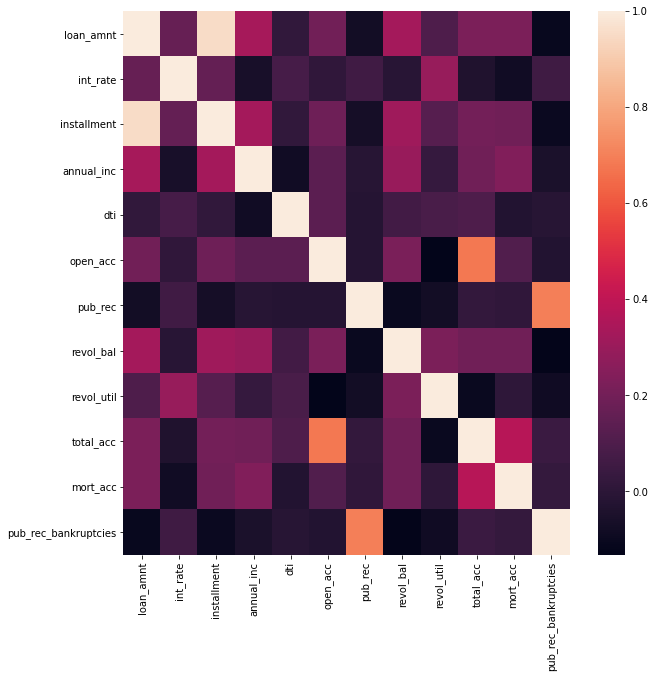

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

<AxesSubplot:xlabel='loan_status', ylabel='count'>

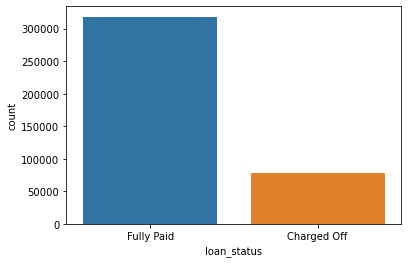

In [63]:
sns.countplot(data=data,x='loan_status')

In [64]:
np.unique(data['grade']==data['sub_grade'].str[0])

array([ True])

In [65]:
# len(np.unique(data['emp_title']))

In [66]:
# len(np.unique(data['title']))

# Data preprocessing

In [73]:
# date variables 
data['earliest_cr_line_M'] = pd.DatetimeIndex(data['earliest_cr_line']).month
data['earliest_cr_line_Y'] = pd.DatetimeIndex(data['earliest_cr_line']).year

In [74]:
data = data.drop(['earliest_cr_line'],axis=1)

In [75]:
# ZIP extraction
data['zip'] = data['address'].apply(lambda x : x[-5:])
len(np.unique(data['zip']))

10

In [76]:
data = data.drop(['address'],axis=1)

In [77]:
# replace missing of cat variables with 'missing'
data[['emp_length']] = data[['emp_length']].fillna('missing')

In [78]:
# replace missing of continous variable
data[['revol_util','mort_acc','pub_rec_bankruptcies']] = data[['revol_util','mort_acc','pub_rec_bankruptcies']].fillna(0)

In [80]:
# integer encoding ordinal categories
from sklearn.preprocessing import OrdinalEncoder

oenc = OrdinalEncoder()
data[['term_enc','sub_grade_enc','emp_length_enc']] = oenc.fit_transform(X=data[['term','sub_grade','emp_length']])
data = data.drop(['term','sub_grade','emp_length'],axis=1)

Fixing wrong encoding
data['emp_length_enc'] = data['emp_length_enc'].replace(0,'1').replace(1,'10').replace(10,'0')
data['emp_length_enc'] = data['emp_length_enc'].replace('1',1).replace('10',10).replace('0',0)

In [82]:
# Dropping cat variables with too many categories or redundant columns
data = data.drop(['grade','emp_title','title','issue_d'],axis=1)

In [83]:
# one hot encoding nominal categories
data = pd.get_dummies(data)

In [ ]:
# response variable 
data['loan_status'] = data['loan_status'].replace('Fully Paid',0).replace('Charged Off',1)

In [85]:
data.corr()['loan_status'].sort_values()

zip_00813                          -0.178674
zip_29597                          -0.177895
zip_05113                          -0.177743
term_ 36 months                    -0.173246
verification_status_Not Verified   -0.085163
                                      ...   
int_rate                            0.247758
zip_86630                           0.341889
zip_93700                           0.344601
zip_11650                           0.345792
loan_status                         1.000000
Name: loan_status, Length: 102, dtype: float64

In [ ]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

# Split and scaling

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = MinMaxScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Logistic regression for comparison

In [99]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train_norm,y_train)
preds_LR = LR.predict(X_test_norm)

print("Accuracy",accuracy_score(y_test,preds_LR))
print("Precision",precision_score(y_test,preds_LR))
print("Recall",recall_score(y_test,preds_LR))

confusion_matrix(y_test,preds_LR)

# NN Grid search

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [128]:
scaler_grid_search = MinMaxScaler().fit(X)
X_grid_search = scaler_grid_search.transform(X)

In [141]:
def create_model(activation='relu',neurons=1,dropout_rate=0):
    model = Sequential()

    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='BinaryCrossentropy', optimizer='adam')
    
    return model

In [152]:
model = KerasClassifier(build_fn=create_model)

In [164]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

param_grid_NN = dict(
                     epochs = [40,60,80,100] 
                    ,batch_size = [2048] 
                    ,neurons = [92,184]
                    ,activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
                    
#                     ,learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#                     ,momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    
#                     ,init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

#                     ,weight_constraint = [1, 2, 3, 4, 5]
                    ,dropout_rate = [0.0, 0.1, 0.2]
                  )

grid_model = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid_NN, n_jobs=1, cv=skf.split(X_grid_search,y))

In [166]:
# grid_result = grid_model.fit(X_grid_search, y.values)

In [158]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888622 using {'activation': 'hard_sigmoid', 'batch_size': 2048, 'dropout_rate': 0.2, 'epochs': 40, 'neurons': 92}
0.888604 (0.000635) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.0, 'epochs': 40, 'neurons': 92}
0.888420 (0.000713) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.0, 'epochs': 40, 'neurons': 184}
0.888200 (0.000809) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.1, 'epochs': 40, 'neurons': 92}
0.888319 (0.000899) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.1, 'epochs': 40, 'neurons': 184}
0.888117 (0.000872) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.2, 'epochs': 40, 'neurons': 92}
0.888175 (0.000891) with: {'activation': 'softmax', 'batch_size': 2048, 'dropout_rate': 0.2, 'epochs': 40, 'neurons': 184}
0.888407 (0.000778) with: {'activation': 'softplus', 'batch_size': 2048, 'dropout_rate': 0.0, 'epochs': 40, 'neurons': 92}
0.888572 (0.000704) 

# Neural network final

In [192]:
callback = EarlyStopping(monitor='val_loss', patience=20, mode='min')

model_final = Sequential()

model_final.add(Dense(92, activation='hard_sigmoid'))
model_final.add(Dropout(0.2))
model_final.add(Dense(92, activation='hard_sigmoid'))
model_final.add(Dropout(0.2))
model_final.add(Dense(92, activation='hard_sigmoid'))
model_final.add(Dense(1,activation='sigmoid'))

model_final.compile(loss='BinaryCrossentropy', optimizer='adam')

In [197]:
model_final.fit(x=X_train_norm,y=y_train.values,
              validation_data=(X_test_norm,y_test.values),
              epochs=200,
              batch_size=2048,
              callbacks=callback)

Epoch 1/200
146/146 [==============================] - 2s 10ms/step - loss: 0.2941 - val_loss: 0.2664
Epoch 2/200
146/146 [==============================] - 1s 9ms/step - loss: 0.2786 - val_loss: 0.2628
Epoch 3/200
146/146 [==============================] - 2s 11ms/step - loss: 0.2731 - val_loss: 0.2618
Epoch 4/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2710 - val_loss: 0.2609
Epoch 5/200
146/146 [==============================] - 2s 14ms/step - loss: 0.2696 - val_loss: 0.2610
Epoch 6/200
146/146 [==============================] - 2s 12ms/step - loss: 0.2683 - val_loss: 0.2608
Epoch 7/200
146/146 [==============================] - 2s 15ms/step - loss: 0.2670 - val_loss: 0.2597
Epoch 8/200
146/146 [==============================] - ETA: 0s - loss: 0.266 - 2s 12ms/step - loss: 0.2663 - val_loss: 0.2596
Epoch 9/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2660 - val_loss: 0.2597
Epoch 10/200
146/146 [==============================] - 2s 

146/146 [==============================] - 2s 13ms/step - loss: 0.2553 - val_loss: 0.2567
Epoch 81/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2555 - val_loss: 0.2566
Epoch 82/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2552 - val_loss: 0.2563
Epoch 83/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2554 - val_loss: 0.2563
Epoch 84/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2552 - val_loss: 0.2566
Epoch 85/200
146/146 [==============================] - 2s 15ms/step - loss: 0.2552 - val_loss: 0.2562
Epoch 86/200
146/146 [==============================] - 2s 14ms/step - loss: 0.2550 - val_loss: 0.2572
Epoch 87/200
146/146 [==============================] - 2s 14ms/step - loss: 0.2554 - val_loss: 0.2564
Epoch 88/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2551 - val_loss: 0.2566
Epoch 89/200
146/146 [==============================] - 2s 13ms/step - loss: 0.2550 - 

In [200]:
losses = pd.DataFrame(model_final.history.history)

<AxesSubplot:>

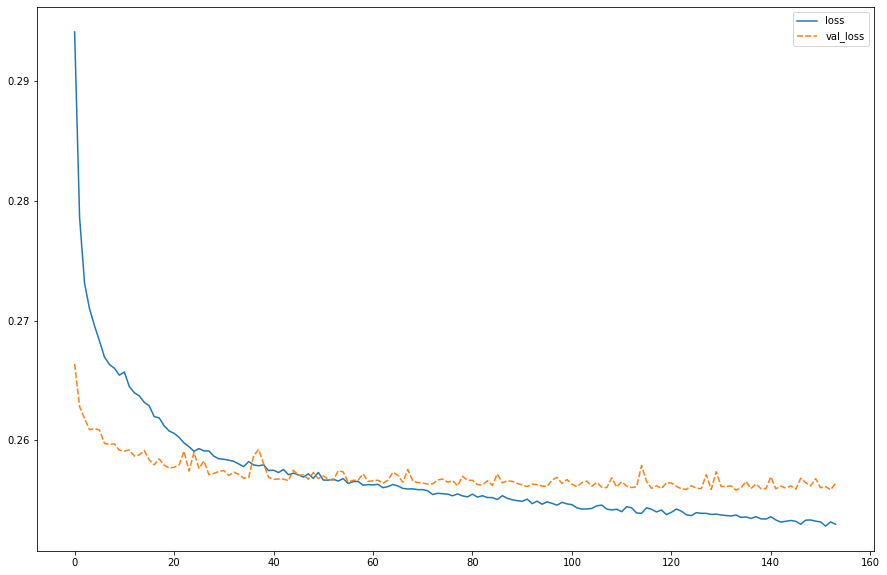

In [201]:
plt.figure(figsize=(15,10))
sns.lineplot(data=losses)

In [202]:
preds = model_final.predict_classes(X_test_norm)

C:\Users\42060\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [203]:
preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# NN Evaluation

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [205]:
print("Accuracy",accuracy_score(y_test,preds))
print("Precision",precision_score(y_test,preds))
print("Recall",recall_score(y_test,preds))

Accuracy 0.8892917744020685
Precision 0.9461669144191973
Recall 0.46016008262328945


In [206]:
confusion_matrix(y_test,preds)

array([[79136,   507],
       [10454,  8911]], dtype=int64)

# XGBoost Grid search

In [207]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [208]:
xgb_grid = XGBClassifier(learning_rate=0.02, n_estimators=200, objective='binary:logistic',silent=True, nthread=1)

In [212]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

param_grid_XGB = dict(
    
        min_child_weight= [1, 5, 10]
        ,gamma= [0.5, 1, 1.5, 2, 5]
        ,subsample= [0.6, 0.8, 1.0]
        ,colsample_bytree= [0.6, 0.8, 1.0]
        ,max_depth= [3, 4, 5]
        ,n_estimators=[200, 300, 400, 500]
        )

grid_model_XGB = RandomizedSearchCV(xgb_grid, param_distributions=param_grid_XGB, n_iter=10, scoring='accuracy', n_jobs=1, cv=skf.split(X_grid_search,y), verbose=3, random_state=1001 )

In [224]:
grid_result_XGB = grid_model_XGB.fit(X_grid_search, y.values)

In [215]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result_XGB.best_params_))
means = grid_result_XGB.cv_results_['mean_test_score']
stds = grid_result_XGB.cv_results_['std_test_score']
params = grid_result_XGB.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888622 using {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 1.0}
0.888102 (0.000849) with: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}
0.888102 (0.000849) with: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 0.8}
0.888102 (0.000849) with: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 1.0}
0.888811 (0.000856) with: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}
0.888102 (0.000849) with: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1.0}
0.888135 (0.000874) with: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 1.5, 'colsample_bytree': 0.6}
0.88

# XGBoost Final

In [106]:
from xgboost import XGBClassifier

In [219]:
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',silent='True', nthread=1,subsample= 0.8, n_estimators= 500, min_child_weight= 10, max_depth= 5, gamma= 1, colsample_bytree= 1.0)

In [220]:
xgb.fit(X_train_norm,y_train)

[17:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent='True', subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

# XGB Evaluation

In [221]:
preds_xgb = xgb.predict(X_test_norm)

In [222]:
print("Accuracy",accuracy_score(y_test,preds_XGB))
print("Precision",precision_score(y_test,preds_XGB))
print("Recall",recall_score(y_test,preds_XGB))

Accuracy 0.8905643988364577
Precision 0.9287293928427824
Recall 0.47709785695843016


In [223]:
confusion_matrix(y_test,preds_XGB)

array([[78934,   709],
       [10126,  9239]], dtype=int64)